In [1]:
from rkcompetition.utils.data_preprocessing import *

ModuleNotFoundError: No module named 'rkcompetition'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
log = pd.read_csv('log.csv')
named = pd.read_csv('named.csv')
type_contract = pd.read_csv('type_contract.csv')
train = pd.read_csv('train_dataset_train.csv')
sample = pd.read_csv('sample_solution.csv')

Изучаем логи

In [ ]:
log['event_date'] = pd.to_datetime(log.event_date)
log

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах
...,...,...,...
25269,11801,2021-04-29 07:50:44,Информер ВК. Показ
25270,54405,2021-03-17 10:38:42,Информер ВК. Показ
25271,54405,2021-03-23 08:21:29,Информер ВК. Показ
25272,54405,2021-04-09 13:04:26,Информер ВК. Показ


In [ ]:
np.unique(log.contract_id).shape, np.unique(log.event_type).shape

((4311,), (105,))

In [ ]:
log.event_type.value_counts()[:40]

Информер ВК. Показ                                                  8001
Включение интернета на 20 минут                                     4092
Обращение в службу заботы о клиентах                                2860
Гарантированный платеж за деньги                                    2679
Виртуальное бессмертие. Использование                                757
Турбокнопка бесплатно                                                546
Включение интернета на 20 минут с IVR                                343
Смена тарифа                                                         335
Состояние клиентского оборудования                                   311
Смена пароля                                                         283
Оборудование                                                         276
Изменение истории                                                    220
Показ информатора об изменении уведомлений через ВК платформу        219
Предложение ТВ                                     

In [ ]:
log['val'] = 1
pivot = pd.pivot_table(log, index = ['contract_id'], columns = 'event_type', values = 'val')

(array([1620., 1028.,  627.,  381.,  242.,  135.,   91.,   67.,   33.,
          30.,   16.,   15.,    9.,    7.,    4.,    6.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 16 Patch objects>)

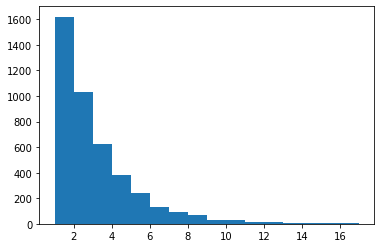

In [ ]:
plt.hist(pivot.sum(axis = 1).sort_values(), bins = np.arange(1, 18))

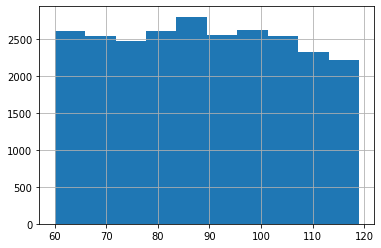

In [ ]:
log.event_date.dt.day_of_year.hist()

изучаем обращение к конкурентам

In [ ]:
named['date'] = pd.to_datetime(named.date)
named

,date,url,contract_id
0,2021-04-17,webmail.sampo.ru,101397
1,2021-04-17,webmail.sampo.ru,179624
2,2021-04-17,tvip-provision.sampo.ru,190335
3,2021-04-17,tvip-provision.sampo.ru,61670
4,2021-04-17,tvip-provision.sampo.ru,39370
...,...,...,...
10646532,2021-04-01,_sip._udp.048056.16.rt.ru,164026
10646533,2021-04-01,048056.16.rt.ru,133945
10646534,2021-04-01,camera.rt.ru,67986
10646535,2021-04-01,camera.rt.ru,31576


In [ ]:
named.date.sort_values()

9675334   2021-03-26
9826418   2021-03-26
9826419   2021-03-26
9826420   2021-03-26
9826421   2021-03-26
             ...    
7271358   2021-04-30
7271357   2021-04-30
7271356   2021-04-30
7271428   2021-04-30
7271370   2021-04-30
Name: date, Length: 10646537, dtype: datetime64[ns]

In [ ]:
np.unique(named.contract_id).shape, np.unique(named.url).shape

((196148,), (6583,))

In [ ]:
named.url.value_counts()[:100]

camera.rt.ru               7333195
vmxott.svc.iptv.rt.ru       289876
tvip-provision.sampo.ru     138944
webmail.sampo.ru            132718
statserv.sampo.ru           110428
                            ...   
keyastromgate.rt.ru           5187
643378.16.rt.ru               5134
425128.16.rt.ru               5054
tracker.sampo.ru              5014
cm-webapi.rt.ru               4934
Name: url, Length: 100, dtype: int64

Странности с contract_id

In [ ]:
train.corr()

,contract_id,blocked
contract_id,1.000000,0.794684
blocked,0.794684,1.000000


Смотрим на тестовую

In [ ]:
sample.contract_id.sort_values()

0      3453
1      3454
2      3455
3      3456
4      3457
       ... 
805    4258
806    4259
807    4260
808    4261
809    4262
Name: contract_id, Length: 810, dtype: int64

type_contract

In [ ]:
type_contract

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0
3,7794,0
4,7795,1
...,...,...
6800,3503,1
6801,3589,0
6802,4261,0
6803,4118,1


# Train

In [ ]:
train.blocked.value_counts()

0    5294
1     698
Name: blocked, dtype: int64

In [ ]:
t_with_logs = [t for t in train.contract_id if t in log.contract_id.values]
len(t_with_logs)

3809

In [ ]:
t_with_named = [t for t in train.contract_id if t in named.contract_id.values]
len(t_with_named)

2915

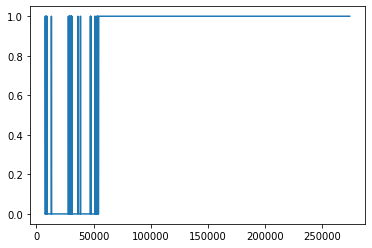

In [ ]:
no_data = train.loc[~train.contract_id.isin(set(t_with_logs).union(set(t_with_named)))] 
plt.plot(no_data.contract_id, no_data.blocked)

In [ ]:
no_data.blocked.value_counts()

0    1098
1     138
Name: blocked, dtype: int64

In [ ]:
no_data.loc[no_data.contract_id > 5e4]

,contract_id,blocked
4161,50011,0
4175,50060,0
4176,50063,0
4178,50068,0
4185,50087,0
...,...,...
5965,272584,1
5969,273158,1
5972,273357,1
5977,273584,1


# test data

In [ ]:
sample

,contract_id,blocked
0,3453,0
1,3454,0
2,3455,0
3,3456,0
4,3457,0
...,...,...
805,4258,0
806,4259,0
807,4260,0
808,4261,0


In [ ]:
sum(sample.contract_id.isin(log.contract_id)), sum(sample.contract_id.isin(named.contract_id))

(502, 390)

In [ ]:
len(set(sample.loc[sample.contract_id.isin(log.contract_id)].contract_id).union(set(sample.loc[sample.contract_id.isin(named.contract_id)].contract_id)))

652

# named for train

In [ ]:
named.loc[named.contract_id.isin(train.contract_id.values)]

,date,url,contract_id
61,2021-04-17,moigorod.sampo.ru,27891
62,2021-04-17,moigorod.sampo.ru,27891
63,2021-04-17,profile.sampo.ru,27891
64,2021-04-17,profile.sampo.ru,27891
65,2021-04-17,ohrana.sampo.ru,27891
...,...,...,...
10645464,2021-03-31,sz-mrsk-itv01.svc.iptv.rt.ru,31215
10645836,2021-03-31,numbers.cloudpbx.rt.ru,49479
10646087,2021-03-31,petrozavodsk.speedtest.rt.ru,14456
10646100,2021-03-31,petrozavodsk.speedtest.rt.ru,46919


In [ ]:
named_t = named.loc[named.contract_id.isin(train.contract_id)]
named_t = named_t.merge(train, on = 'contract_id')
named_t['day_of_year'] = named_t.date.dt.day_of_year
named_t

,date,url,contract_id,blocked,day_of_year
0,2021-04-17,moigorod.sampo.ru,27891,0,107
1,2021-04-17,moigorod.sampo.ru,27891,0,107
2,2021-04-17,profile.sampo.ru,27891,0,107
3,2021-04-17,profile.sampo.ru,27891,0,107
4,2021-04-17,ohrana.sampo.ru,27891,0,107
...,...,...,...,...,...
130726,2021-03-31,rt-static.rt.ru,49248,0,90
130727,2021-03-31,fnc.rt.ru,161029,1,90
130728,2021-03-31,fnc.rt.ru,161029,1,90
130729,2021-03-31,wink.rt.ru,14720,0,90


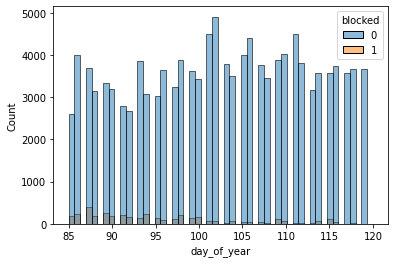

In [ ]:
sns.histplot(data = named_t, x = 'day_of_year', hue = 'blocked')

In [ ]:
# среднее число откликов по ушедшим и нет

named_t.loc[named_t.blocked == 0].shape, named_t.loc[named_t.blocked == 1].shape

((126744, 5), (3987, 5))

In [ ]:
top_urls = named_t.url.value_counts()[:150].index
named_t_top = named_t.loc[named_t.url.isin(top_urls)]

In [ ]:
named_t_top = named_t.loc[named_t.url.isin(top_urls)]

In [ ]:
named_pivot = long_to_wide(named_t_top, 'url', 'outer')
named_pivot

url,91853.vpbx.sampo.ru,_bittorrent-tracker._tcp.sampo.ru,_ldap._tcp.dc._msdcs.sampo.ru,_ldap._tcp.dc._msdcs.sz.rt.ru,acs.rt.ru,adengine.old.rt.ru,ads.pereezd-online.rt.ru,af.rt.ru,appstore.iptv.rt.ru,b2c.passport.rt.ru,...,webmail.sampo.ru,wifi.sampo.ru,wifilogin.sampo.ru,wink.rt.ru,wpad.sampo.ru,www.rt.ru,www.sampo.ru,outer_total_actions,outer_total_actions_minus_mean,outer_total_actions_divide_mean
contract_id,,,,,,,,,,,,,,,,,,,,,
7780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038462,0.038462,0.0,0.0,0.0,0.0,0.0,26.0,-20.169097,4.459001
7785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.0,0.830903,0.857500
7799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,4.830903,0.171500
7805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,4.830903,0.171500
7807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,4.830903,0.171500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,2.0,3.830903,0.343000
272061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.2,0.0,0.0,0.0,5.0,0.830903,0.857500
273472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,4.830903,0.171500


# logs train

In [ ]:
log_pivot = long_to_wide(log, 'event_type', 'inner')
log_pivot

event_type,Абонент оставил отзыв в Личном кабинете,Активация ГП с IVR,Активация автоматического гарантированного платежа,Активация гарантированного платежа,Активация точки подключения на сутки,Без границ бесплатно. Включение,Без границ бесплатно. Отключение,Без границ платно. Включение,Без границ платно. Отключение,Блокировка,...,Уведомления: подключение,Уведомления: подтверждение,Удаление ip-адреса,Удаление из Обращались с номеров,Удаление телефона из записи,Футболка Ситилинк,Чек лист выполненных работ при регистрации,inner_total_actions,inner_total_actions_minus_mean,inner_total_actions_divide_mean
contract_id,,,,,,,,,,,,,,,,,,,,,
3453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.691023,0.371606
3454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.691023,0.371606
3456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,-1.308977,1.486424
3457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.691023,0.371606
3458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.691023,0.743212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-2.308977,1.858029
274710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,-4.308977,2.601241
274782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,-2.308977,1.858029


# log per day


In [ ]:
log_with_last_date = log.merge(log.groupby('contract_id').event_date.max(), left_on = 'contract_id', right_index = True,)
log_with_last_date.event_date_x = pd.to_datetime(log_with_last_date.event_date_x)
log_with_last_date.event_date_y = pd.to_datetime(log_with_last_date.event_date_y)
log_with_last_date['weeks_until_last_action'] = log_with_last_date.event_date_y.dt.week - log_with_last_date.event_date_x.dt.week
log_with_last_date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,contract_id,event_date_x,event_type,val,event_date_y,weeks_until_last_action
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров,1,2021-04-07 15:37:55,2
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах,1,2021-04-07 15:37:55,2
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета,1,2021-04-07 15:37:55,2
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета,1,2021-04-07 15:37:55,2
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах,1,2021-04-07 15:37:55,2
...,...,...,...,...,...,...
25239,33499,2021-04-15 19:11:33,Включение интернета на 20 минут,1,2021-04-15 19:11:33,0
25270,54405,2021-03-17 10:38:42,Информер ВК. Показ,1,2021-04-29 19:29:29,6
25271,54405,2021-03-23 08:21:29,Информер ВК. Показ,1,2021-04-29 19:29:29,5
25272,54405,2021-04-09 13:04:26,Информер ВК. Показ,1,2021-04-29 19:29:29,3


In [ ]:
days_till_last_action = log_with_last_date.groupby('contract_id').event_date_x.max().dt.week - \
    log_with_last_date.groupby('contract_id').event_date_x.min().dt.week
days_till_last_action.name = 'days_till_last_action'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
days_till_last_action

contract_id
3453      0
3454      0
3456      0
3457      7
3458      8
         ..
274601    0
274710    0
274782    1
274786    2
274918    0
Name: days_till_last_action, Length: 4311, dtype: int64

In [ ]:
actions_per_last_date = log_with_last_date.groupby(['contract_id', 'weeks_until_last_action']).count().reset_index()  
action_week_tab = pd.pivot_table(actions_per_last_date, index = 'contract_id', columns = 'weeks_until_last_action', values = 'val')
action_week_tab = action_week_tab.fillna(0)
action_week_tab = action_week_tab.div(action_week_tab.sum(axis=1), axis=0)
for i in range(1, 8):
    action_week_tab['{}_{}'.format(i, i - 1)] = action_week_tab[i] / (action_week_tab[i - 1] + 1)
action_week_tab = action_week_tab.fillna(0)
action_week_tab 

weeks_until_last_action,0,1,2,3,4,5,6,7,8,1_0,2_1,3_2,4_3,5_4,6_5,7_6
contract_id,,,,,,,,,,,,,,,,
3453,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3454,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3456,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3457,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.75
3458,0.086957,0.086957,0.086957,0.130435,0.217391,0.086957,0.086957,0.086957,0.130435,0.080000,0.080000,0.12,0.192308,0.071429,0.08,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274601,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
274710,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
274782,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [ ]:

action_week_tab

weeks_until_last_action,0,1,2,3,4,5,6,7,8,1_0,2_1,3_2,4_3,5_4,6_5,7_6
contract_id,,,,,,,,,,,,,,,,
3453,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3454,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3456,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
3457,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.75
3458,0.086957,0.086957,0.086957,0.130435,0.217391,0.086957,0.086957,0.086957,0.130435,0.080000,0.080000,0.12,0.192308,0.071429,0.08,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274601,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
274710,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00
274782,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.00,0.00


In [ ]:
action_week_tab.merge(days_till_last_action, left_index = True, right_index = True)

,0,1,2,3,4,5,6,7,8,1_0,2_1,3_2,4_3,5_4,6_5,7_6,days_till_last_action
contract_id,,,,,,,,,,,,,,,,,
3453,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0
3454,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0
3456,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0
3457,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.75,7
3458,0.086957,0.086957,0.086957,0.130435,0.217391,0.086957,0.086957,0.086957,0.130435,0.080000,0.080000,0.12,0.192308,0.071429,0.08,0.08,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274601,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0
274710,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0
274782,0.750000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.00,0.000000,0.000000,0.00,0.00,1


connect data

In [ ]:
# merging
df_train = train.merge(log_pivot.reset_index(), on = 'contract_id', how = 'left')
df_train = df_train.merge(type_contract, on = 'contract_id', how = 'left')
df_train = df_train.merge(named_pivot.reset_index(), on = 'contract_id', how = 'left')
df_train = df_train.merge(action_week_tab.reset_index(), on = 'contract_id')
df_train['outer_more_than_inner'] = df_train.apply(lambda x: True if x.inner_total_actions < x.outer_total_actions else False, axis = 1)
# dropping
df_train = df_train.drop('contract_id', axis = 1)
df_train = df_train.fillna(0)
df_train

,blocked,Абонент оставил отзыв в Личном кабинете,Активация ГП с IVR,Активация автоматического гарантированного платежа,Активация гарантированного платежа,Активация точки подключения на сутки,Без границ бесплатно. Включение,Без границ бесплатно. Отключение,Без границ платно. Включение,Без границ платно. Отключение,...,7,8,1_0,2_1,3_2,4_3,5_4,6_5,7_6,outer_more_than_inner
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.111111,0.2,0.272727,0.000000,0.222222,0.0,True
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,True
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.375000,0.300000,0.0,0.000000,0.000000,0.000000,0.0,False
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.666667,0.000000,0.0,False
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.750000,0.0,0.125000,0.000000,0.000000,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,False
3806,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,False
3807,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.142857,0.000000,0.0,0.000000,0.000000,0.000000,0.0,False
3808,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.133333,0.090909,0.0,0.000000,0.000000,0.000000,0.0,False


In [ ]:
for col in df_train.columns:
    if 'Предложение' in str(col):
        print(col)

Предложение IPTV
Предложение ТВ
Предложение ТВ-пакета
Предложение автоплатежа
Предложение доп.гарантии на роутер
Предложение расширенной гарантии на ТВ приставку
Предложение роутера
Предложение тарифа


In [ ]:
def unify_drop_columns(df, col_tag):
    cols = [col for col in df.columns if col_tag in str(col)]
    df[col_tag] = np.sum(df[cols], axis = 1)
    df = df.drop(cols, axis = 1)
    return df


unify_keys = ['storage', 'broadcast', 'бессмерти', 'iptv', 'kino', 'camera', 'rupor', 'speedtest', 'скидка', 'tracker', 'lk', 'wifi', 'pay', 'stat', 'capsule']

for key in unify_keys:
    df_train = unify_drop_columns(df_train, key)


In [ ]:
list(df_train)

['blocked',
 'Абонент оставил отзыв в Личном кабинете',
 'Активация ГП с IVR',
 'Активация автоматического гарантированного платежа',
 'Активация гарантированного платежа',
 'Активация точки подключения на сутки',
 'Без границ бесплатно. Включение',
 'Без границ бесплатно. Отключение',
 'Без границ платно. Включение',
 'Без границ платно. Отключение',
 'Блокировка',
 'Блокировка лицевого счета',
 'Бонус-скорость',
 'Включение IPTV-пакета',
 'Включение Бесплатной аренды',
 'Включение автоматической активации ГП',
 'Включение блокировки лицевого счета',
 'Включение интернета на 20 минут',
 'Включение интернета на 20 минут с IVR',
 'Включение ограничения функций ТВ',
 'Включение старых условий аренды',
 'Включение управления услугами по паролю',
 'Включение услуги Аренда ТВ-приставки',
 'Внесение',
 'Внутреннее сообщение',
 'Возвращение гарантированного платежа',
 'Возвращение клиента',
 'Восстановление пароля',
 'Выключение IPTV-пакета',
 'Гарантированный платеж за деньги',
 'Добавление 

In [ ]:
top_features = df_train.corr()['blocked'].dropna().abs() > 0.00
top_features = top_features.loc[top_features == True].index
list(top_features)

['blocked',
 'Абонент оставил отзыв в Личном кабинете',
 'Активация ГП с IVR',
 'Активация автоматического гарантированного платежа',
 'Активация гарантированного платежа',
 'Активация точки подключения на сутки',
 'Без границ бесплатно. Включение',
 'Без границ бесплатно. Отключение',
 'Без границ платно. Включение',
 'Без границ платно. Отключение',
 'Блокировка',
 'Бонус-скорость',
 'Включение IPTV-пакета',
 'Включение Бесплатной аренды',
 'Включение автоматической активации ГП',
 'Включение интернета на 20 минут',
 'Включение интернета на 20 минут с IVR',
 'Включение ограничения функций ТВ',
 'Включение старых условий аренды',
 'Включение управления услугами по паролю',
 'Включение услуги Аренда ТВ-приставки',
 'Внесение',
 'Внутреннее сообщение',
 'Возвращение гарантированного платежа',
 'Возвращение клиента',
 'Восстановление пароля',
 'Выключение IPTV-пакета',
 'Гарантированный платеж за деньги',
 'Добавление в Обращались с номеров',
 'Закрепление сообщения',
 'Закрытие информат

In [ ]:
df_train = df_train[top_features]

In [ ]:
y = df_train.pop('blocked')
x = df_train

In [ ]:
parameters = {}
lr = LogisticRegression(max_iter=1000, class_weight = 'balanced', C = 20)

scaler = MinMaxScaler()
pipe = Pipeline(steps=[("scaler", scaler), ("logistic", lr)])

cl = CatBoostClassifier(verbose = False, auto_class_weights = 'Balanced')
clf = GridSearchCV(cl, parameters,  scoring = 'f1_macro')
clf.fit(x, y)
clf.best_score_

0.6561357792888015

In [ ]:
pd.DataFrame().from_dict([{name: val for name, val in zip(df_train.columns, clf.best_estimator_.get_feature_importance())}]).T.abs().sort_values(by = 0, ascending = False)[:40]

,0
Информер ВК. Показ,5.438422
fnc.rt.ru,4.345918
Отключение услуги Аренда ТВ-приставки,3.336923
outer_total_actions_minus_mean,2.893521
outer_total_actions_divide_mean,2.675350
outer_total_actions,2.544098
2_1,2.505650
5_4,2.435666
data.sampo.ru,2.415138
0,2.243433


In [ ]:
clf.best_estimator_.coef_

AttributeError: ignored